In [1]:
!pip install nibabel torch torchvision torchio numpy scipy tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import Packages

In [ ]:
import os
import nibabel as nib
import numpy as np
from scipy.ndimage import zoom
import torch
import torchio as tio
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

## Set Folder Paths

In [ ]:
images_path = r"C:/Users/ADMIN/Desktop/images"
labels_path = r"C:/Users/ADMIN/Desktop/labels"
save_path_images = r"C:/Users/ADMIN/Desktop/preprocessed_images"
save_path_labels = r"C:/Users/ADMIN/Desktop/preprocessed_labels"

os.makedirs(save_path_images, exist_ok=True)
os.makedirs(save_path_labels, exist_ok=True)

NameError: name 'os' is not defined

## Preprocessing Function

In [ ]:
def preprocess_image_label(img_path, label_path, target_shape=(128, 128, 64), clip_range=(-200, 250)):
    # Load 3D MRI image and label
    img = nib.load(img_path).get_fdata()
    label = nib.load(label_path).get_fdata()

    # Histogram clipping to suppress outliers
    img = np.clip(img, clip_range[0], clip_range[1])

    # Z-score normalization
    img = (img - np.mean(img)) / np.std(img)

    # Resize both image and label using the same zoom factors
    zoom_factors = [t / s for t, s in zip(target_shape, img.shape)]
    img_resized = zoom(img, zoom_factors, order=1)  # Interpolation for image
    label_resized = zoom(label, zoom_factors, order=0)  # Nearest for mask

    return img_resized, label_resized


## Batch Preprocess All Images & Labels

In [ ]:
for i in range(60):
    img_file = f"im{i}.nii"
    label_file = f"lb{i}.nii"

    img_path = os.path.join(images_path, img_file)
    label_path = os.path.join(labels_path, label_file)

    try:
        pre_img, pre_mask = preprocess_image_label(img_path, label_path)

        # Skip if mask is empty (no tumor)
        if np.sum(pre_mask) == 0:
            print(f"⚠️ Skipped empty mask: {label_file}")
            continue

        # Save preprocessed data
        nib.save(nib.Nifti1Image(pre_img, affine=np.eye(4)), os.path.join(save_path_images, img_file))
        nib.save(nib.Nifti1Image(pre_mask, affine=np.eye(4)), os.path.join(save_path_labels, label_file))

        print(f"✅ Processed: {img_file}, {label_file}")

    except Exception as e:
        print(f"❌ Failed: {img_file}, {label_file} | Error: {e}")


✅ Processed: im0.nii, lb0.nii
✅ Processed: im1.nii, lb1.nii
✅ Processed: im2.nii, lb2.nii
✅ Processed: im3.nii, lb3.nii
✅ Processed: im4.nii, lb4.nii
✅ Processed: im5.nii, lb5.nii
✅ Processed: im6.nii, lb6.nii
✅ Processed: im7.nii, lb7.nii
✅ Processed: im8.nii, lb8.nii
✅ Processed: im9.nii, lb9.nii
✅ Processed: im10.nii, lb10.nii
✅ Processed: im11.nii, lb11.nii
✅ Processed: im12.nii, lb12.nii
✅ Processed: im13.nii, lb13.nii
✅ Processed: im14.nii, lb14.nii
✅ Processed: im15.nii, lb15.nii
✅ Processed: im16.nii, lb16.nii
✅ Processed: im17.nii, lb17.nii
✅ Processed: im18.nii, lb18.nii
✅ Processed: im19.nii, lb19.nii
✅ Processed: im20.nii, lb20.nii
✅ Processed: im21.nii, lb21.nii
✅ Processed: im22.nii, lb22.nii
✅ Processed: im23.nii, lb23.nii
✅ Processed: im24.nii, lb24.nii
✅ Processed: im25.nii, lb25.nii
✅ Processed: im26.nii, lb26.nii
✅ Processed: im27.nii, lb27.nii
✅ Processed: im28.nii, lb28.nii
✅ Processed: im29.nii, lb29.nii
✅ Processed: im30.nii, lb30.nii
✅ Processed: im31.nii, lb31.

## Visual Check for Alignment

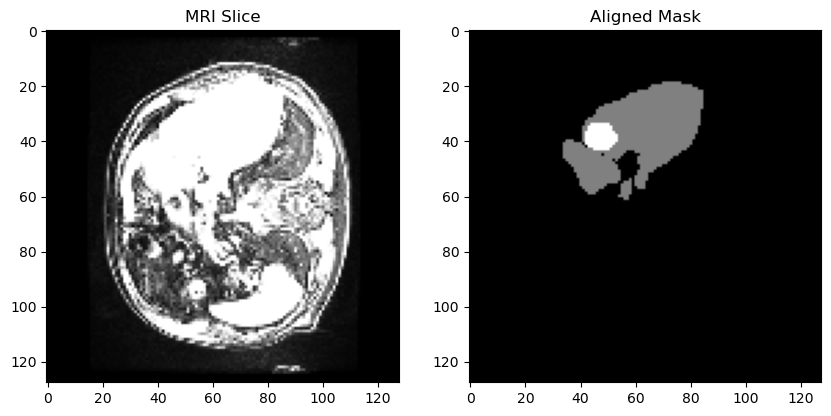

In [ ]:
sample_index = 50
img = nib.load(os.path.join(save_path_images, f"im{sample_index}.nii")).get_fdata()
mask = nib.load(os.path.join(save_path_labels, f"lb{sample_index}.nii")).get_fdata()

mid_slice = img.shape[2] // 2

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img[:, :, mid_slice], cmap="gray")
plt.title("MRI Slice")

plt.subplot(1, 2, 2)
plt.imshow(mask[:, :, mid_slice], cmap="gray")
plt.title("Aligned Mask")
plt.show()